# Boston Hosuing Price Prediction Machine Learning Project

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [38]:
#Loading the data in 'df' and printing the df
df = pd.read_csv("C:/ASLAM/Machine Learning- Final project/boston.csv")
df

,ID,TOWN,TOWNNO,TRACT,LON,LAT,x,y,MEDV,CMEDV,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.0,0.0,2011.0,-70.9550,42.2550,338.73,4679.73,24.0,24.0,...,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,2.0,0.0,1.0,2021.0,-70.9500,42.2875,339.23,4683.33,21.6,21.6,...,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,3.0,0.0,1.0,2022.0,-70.9360,42.2830,340.37,4682.80,34.7,34.7,...,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,4.0,0.0,2.0,2031.0,-70.9280,42.2930,341.05,4683.89,33.4,33.4,...,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,5.0,0.0,2.0,2032.0,-70.9220,42.2980,341.56,4684.44,36.2,36.2,...,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502.0,0.0,91.0,1801.0,-70.9860,42.2312,336.11,4677.14,22.4,22.4,...,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,503.0,0.0,91.0,1802.0,-70.9910,42.2275,335.69,4676.74,20.6,20.6,...,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,504.0,0.0,91.0,1803.0,-70.9948,42.2260,335.37,4676.58,23.9,23.9,...,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,505.0,0.0,91.0,1804.0,-70.9875,42.2240,335.97,4676.35,22.0,22.0,...,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
#Displaying information about the df columns,data types, non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       506 non-null    float64
 1   TOWN     506 non-null    float64
 2   TOWNNO   506 non-null    float64
 3   TRACT    506 non-null    float64
 4   LON      506 non-null    float64
 5   LAT      506 non-null    float64
 6   x        506 non-null    float64
 7   y        506 non-null    float64
 8   MEDV     506 non-null    float64
 9   CMEDV    506 non-null    float64
 10  CRIM     506 non-null    float64
 11  ZN       506 non-null    float64
 12  INDUS    506 non-null    float64
 13  CHAS     506 non-null    float64
 14  NOX      506 non-null    float64
 15  RM       506 non-null    float64
 16  AGE      506 non-null    float64
 17  DIS      506 non-null    float64
 18  RAD      506 non-null    float64
 19  TAX      506 non-null    float64
 20  PTRATIO  506 non-null    float64
 21  B        506 non

In [5]:
df.isnull().sum() #Displaying the sum of null or missing values for each column in the DataFrame 'df'.

ID         0
TOWN       0
TOWNNO     0
TRACT      0
LON        0
LAT        0
x          0
y          0
MEDV       0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
df.describe().T #Descirbing summary statistics table for the DataFrame 'df' 

,count,mean,std,min,25%,50%,75%,max
ID,506.0,253.500000,146.213884,1.00000,127.250000,253.50000,379.750000,506.0000
TOWN,506.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0000
TOWNNO,506.0,47.531621,27.571401,0.00000,26.250000,42.00000,78.000000,91.0000
TRACT,506.0,2700.355731,1380.036830,1.00000,1303.250000,3393.50000,3739.750000,5082.0000
LON,506.0,-71.056389,0.075405,-71.28950,-71.093225,-71.05290,-71.019625,-70.8100
LAT,506.0,42.216440,0.061777,42.03000,42.180775,42.21810,42.252250,42.3810
x,506.0,330.263893,6.251767,310.85000,327.237500,330.54000,333.390000,350.2300
y,506.0,4675.644071,6.838865,4654.55000,4671.735000,4675.88500,4679.595000,4693.7300
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CMEDV,506.0,22.528854,9.182176,5.00000,17.025000,21.20000,25.000000,50.0000


In [7]:
np.shape(df) #Displaying the shape of the Dataframe 'df' 

(506, 23)

## HeatMap for Boston housing

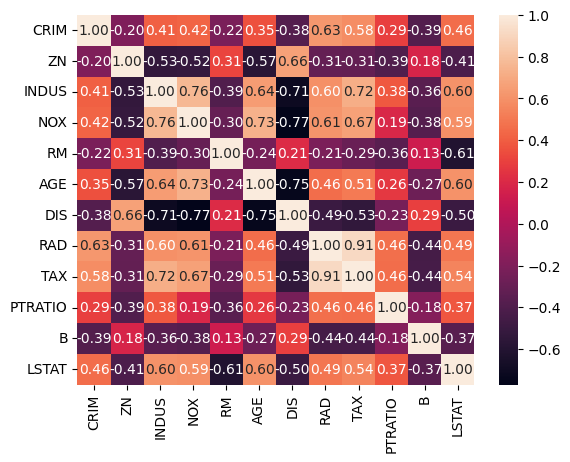

In [8]:
# Create a heatmap
hm = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
#Creating a Seaborn heatmap to visualize the correlation matrix of a DataFrame (hm)
sns.heatmap(hm.corr(), annot=True, fmt=".2f") # Formatting to two decimal places.

# Display the plot
plt.show()

In [9]:
# Input or independent value
#Here, we are removing the column 'MEDV' and droping other columns execpt 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
X = hm 

# Output or dependent value
y = df['MEDV']  #Here we are giving target value as 'MEDV'

In [10]:
#Here we are splitting X and y into training and testing sets using the train_test_split function, where 30% of the data is used for testing and a random seed of 10 is set.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

## Linear Regression

In [11]:
# Model instantiation
linear_model = LinearRegression()

# Fit the model with input and corresponding output data
linear_model.fit(x_train, y_train)

LinearRegression()

In [40]:
predicted_house_price = linear_model.predict(x_test) #Here,we use trained linear regression model to predict the test set, which is stored in variable predicted_house_price.
print("Predicted House Prices")
print(predicted_house_price)

Predicted House Prices
[31.53116229 31.97338284 30.90799663 22.2820305  19.07957839 16.30836442
 36.29794454 14.80651091 23.50814561 37.43565189 21.49271829 29.49946886
 28.17066841 34.14081973 32.23777382 41.02292337 24.28244117 23.52387792
 25.61396162 19.98405767 32.99062956 17.97539657 25.56586059 25.08318698
 32.58223039 20.55048279 19.65562404 17.00254009 37.0653949   0.24729196
 32.46132772 32.37950861 26.01353578 23.84257134 20.74963977 19.70701157
  3.4926713  35.24375845 27.12522846 27.76917535 34.51771441 30.01764758
 18.48435147 31.55971052 18.04312069 28.50196309 19.59377509 21.74857218
 38.38309092 16.49825477 24.75333964 19.75558403 24.65165493 34.4498715
 26.88641533 35.15073799 21.05870026 19.96000153 18.6363819  24.85447258
 20.03310852 23.60396117 38.36690847 43.21495859 30.46829964 17.06800008
 23.83006433  3.11607242 31.71797011 28.77514605 18.57846322 27.30402795
 19.7172154  23.82172993 25.11023423 10.18338923 39.30248178  8.21412953
 18.55891055 30.35091079 23.0

In [13]:
#Here, we create predicted_dataframe to compare Predicted_Prices with Actual_Prices from the y_test.
predicted_dataframe = pd.DataFrame(
    {"Predicted_Prices": predicted_house_price, "Actual_Prices": y_test})
print("Predicted and Actual Price Data frame")
print(predicted_dataframe)

Predicted and Actual Price Data frame
     Predicted_Prices  Actual_Prices
305         31.531162           28.4
193         31.973383           31.1
65          30.907997           23.5
349         22.282030           26.6
151         19.079578           19.6
..                ...            ...
56          25.741036           24.7
37          23.344649           21.0
66          26.309669           19.4
427         11.400926           10.9
12          20.523466           21.7

[152 rows x 2 columns]


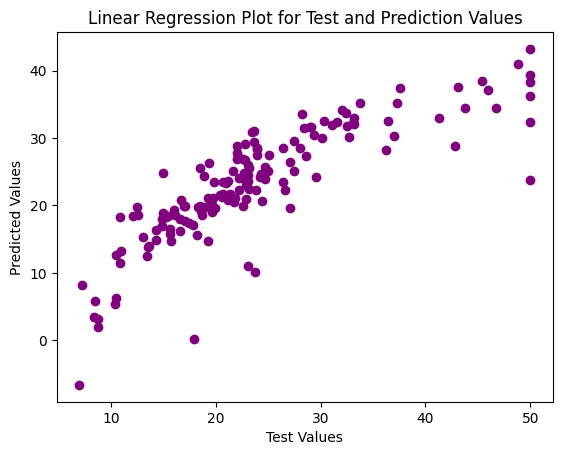

In [14]:
plt.scatter(y_test, predicted_house_price, color='purple') #Here, we plot a scatter plot for y_test and predicted_house_price

# Set Plot Title and Labels
plt.title('Linear Regression Plot for Test and Prediction Values')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
# Save Plot
plt.savefig('C:/Users/syeda/Downloads/LinearRegression.jpg', dpi=300, bbox_inches='tight')

In [15]:
import numpy as np

#Here, we calculate the MSE between the actual prices and the predicted house prices. 
def mean_squared_error(y_test, predicted_house_price):
    return np.mean((y_test - predicted_house_price) ** 2)

In [18]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_test, predicted_house_price)
round(mse_lr,2)  #Here we round upto 2 decimal points for MSE

30.25

In [19]:
import numpy as np

#Here, we calculate the MAE between the actual prices and the predicted house prices.
def mean_absolute_error(y_test, predicted_house_price):
    return np.mean(np.abs(y_test - predicted_house_price))

In [20]:
mae_lr = mean_absolute_error(y_test, predicted_house_price)
round(mae_lr,2)   #Here we round upto 2 decimal points for MAE

3.72

In [21]:
from sklearn.metrics import r2_score

#Here, we calculate the r_squared between the actual prices and the predicted house prices.
def r_squared(y_test, predicted_house_price):
    return r2_score(y_test, predicted_house_price)

In [22]:
r_sq_lr = r_squared(y_test, predicted_house_price)
round(r_sq_lr,2)  #Here we round upto 2 decimal points for r_squared

0.69

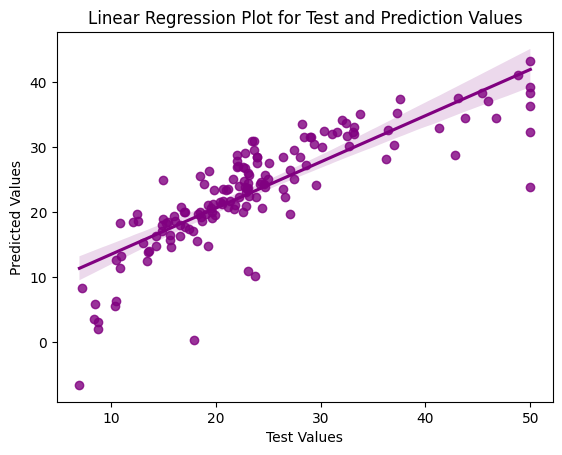

In [24]:
# Create Linear Regression Plot
sns.regplot(x= y_test, y= predicted_house_price, color='purple')

# Set Plot Title and Labels
plt.title('Linear Regression Plot for Test and Prediction Values')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
# Save Plot
plt.savefig('C:/Users/syeda/Downloads/LinearRegression1.jpg', dpi=300, bbox_inches='tight')

## KNN Regression

In [25]:
#Creating a KNeighborsRegressor with 7 neighbors, fits it to the training data to train the model.
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [26]:
Y_pred = knn.predict(x_test)  # Prediction done for x_test and the trained KNeighborsRegressor model which is stored in the variable Y_pred.

# Create Dataset with Testing values and Predicted Prices
print("KNN Regresson Model")
model_knn = pd.DataFrame(x_test)
model_knn['MEDV'] = y_test
model_knn['Predicted_MEDV'] = Y_pred
model_knn.head(10)

KNN Regresson Model


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Predicted_MEDV
305,0.05479,33.0,2.18,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93,28.4,29.100000
193,0.02187,60.0,2.93,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03,31.1,32.242857
65,0.03584,80.0,3.37,0.398,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67,23.5,28.242857
349,0.02899,40.0,1.25,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89,26.6,25.057143
151,1.49632,0.0,19.58,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28,19.6,21.314286
433,5.58107,0.0,18.10,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22,14.3,13.342857
161,1.46336,0.0,19.58,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0,29.742857
129,0.88125,0.0,21.89,0.624,5.637,94.7,1.9799,4.0,437.0,21.2,396.90,18.34,14.3,17.185714
269,0.09065,20.0,6.96,0.464,5.920,61.5,3.9175,3.0,223.0,18.6,391.34,13.65,20.7,26.585714
226,0.38214,0.0,6.20,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6,28.257143


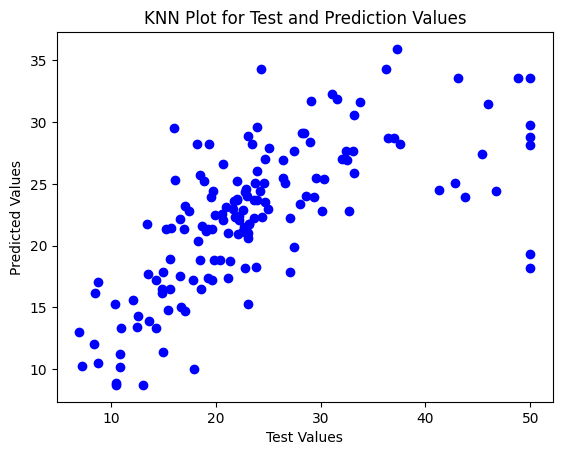

In [27]:
plt.scatter(model_knn['MEDV'], model_knn['Predicted_MEDV'], color='blue') #Here, we plot a scatter plot for 'MEDV' and 'Predicted_MEDV'

# Set Plot Title and Labels
plt.title('KNN Plot for Test and Prediction Values')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
# Save Plot
plt.savefig('C:/Users/syeda/Downloads/KNNRegression.jpg', dpi=300, bbox_inches='tight')

In [28]:
# Measure Performance of the Model
# Getting Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse_knn = mean_squared_error(y_test, Y_pred)
round(mse_knn,2)   #Here we round upto 2 decimal points for MSE

55.74

In [29]:
# Getting Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae_knn = mean_absolute_error(y_test, Y_pred)
round(mae_knn,2)   #Here we round upto 2 decimal points for MAE

4.83

In [30]:
# Getting R-squared error
from sklearn.metrics import r2_score
r_sq_knn = r_squared(y_test, Y_pred)
round(r_sq_knn,2)  #Here we round upto 2 decimal points for r_squared

0.43

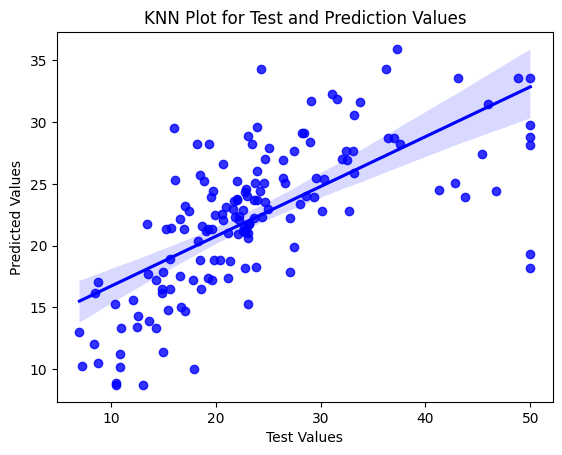

In [31]:
# Create KNN Plot
sns.regplot(x='MEDV', y='Predicted_MEDV', data=model_knn, color='blue')

# Set Plot Title and Labels
plt.title('KNN Plot for Test and Prediction Values')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')

# Save Plot
plt.savefig('C:/Users/syeda/Downloads/KNNRegression1.jpg', dpi=300, bbox_inches='tight')

## Random Forest Regression

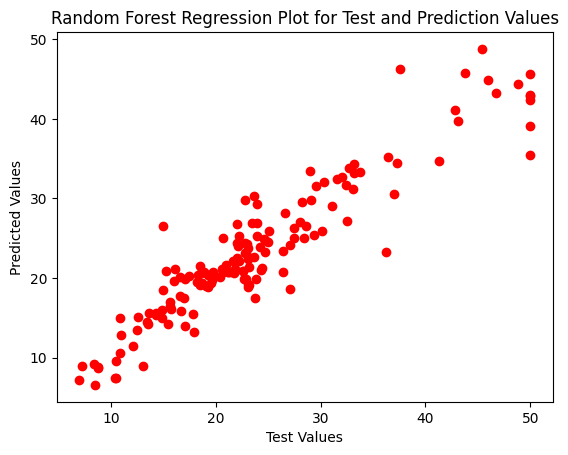

In [32]:
#creating a RandomForestRegressor with 100 estimators and a random seed of 10.
rfr = RandomForestRegressor(n_estimators=100, random_state=10)
rfr.fit(x_train , y_train)    #Fitting the model to the training data
Y_pred = rfr.predict(x_test)    #Predicting target values x_test and storing it in the variable 'Y_pred'.

#Here, we plot a scatter plot for 'y_test' and 'Y_pred'
plt.scatter(y_test, Y_pred, color = 'red')
plt.xlabel("Test Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression Plot for Test and Prediction Values")
# Save Plot
plt.savefig('C:/Users/syeda/Downloads/RandomForestRegression.jpg', dpi=300, bbox_inches='tight')

In [34]:
# Getting Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse_rfr = mean_squared_error(y_test, Y_pred)
round(mse_rfr,2)

12.66

In [35]:
# Getti Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae_rfr = mean_absolute_error(y_test, Y_pred)
round(mae_rfr,2)

2.48

In [36]:
# Get R-squared error
from sklearn.metrics import r2_score
r_sq_rfr = r_squared(y_test, Y_pred)
round(r_sq_rfr,2)

0.87

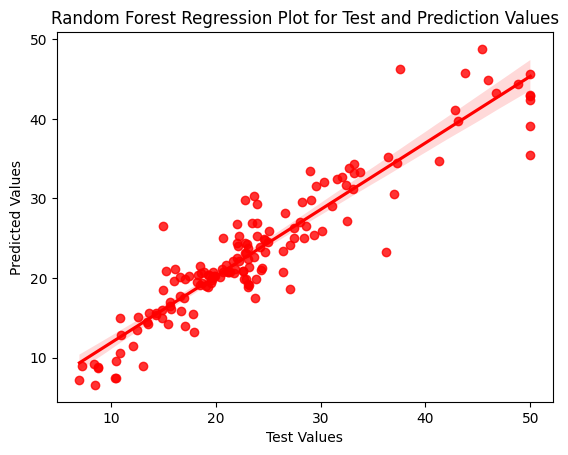

In [37]:
# Create Random Forest Regression Plot
sns.regplot(x=y_test, y=Y_pred, color='red')

# Set Plot Title and Labels
plt.title('Random Forest Regression Plot for Test and Prediction Values')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')

# Save Plot
plt.savefig('C:/Users/syeda/Downloads/RandomForestRegression1.jpg', dpi=300, bbox_inches='tight')

**Reference:**

**ChatGPT:** https://chat.openai.com/share/e31f8838-1fdf-4b46-89f8-1d3228da0673